# Experiment 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

class data_storage:
    b = np.array([]);
    l = np.array([]);
    t = np.array([]);
    v = np.array([]);
    d = np.array([]);
    g = np.array([]);
    s = np.array([]);
    c = np.array([]);

def extract_data( TXTpath ):
    X = data_storage()
    Cb = 0;
    Ct = 0;
    with open(TXTpath) as f:
        line = f.readline()
        while line:
            line = f.readline()
            if( line[0:2] == ".b" ):
                Cb+=1;
                X.b = np.append(X.b, int(line[2:]))
            if( line[0:2] == ".g" ):
                X.g = np.append(X.g, int(line[3:]))        
            if( line[0:2] == ".s" ):
                X.s = np.append(X.s, int(line[3:]))
            if( line[0:2] == ".c" ):
                X.c = np.append(X.c, float(line[3:]))
            if( line[0:2] == ".d" ):
                X.d = np.append(X.d, int(line[3:]))
            if( line[0:2] == ".l" ):
                X.l = np.append(X.l,float(line[3:]))
            if( line[0:2] == ".t" ):
                Ct+=1;
                X.t = np.append(X.t,float(line[3:]))
                if( Cb != Ct ):
                    print(X.b[Cb-1])
            if( line[0:2] == ".v" ):
                X.v = np.append(X.v,float(line[3:]))
            
    return X
    


D0 = extract_data( 'sdec/RES/summary.txt' )
D1 = extract_data( 'isdec/RES/summary.txt' )
D2 = extract_data( 'itsdec/RES/summary.txt' )
D3 = extract_data( 'ixtsdec/RES/summary.txt' )
D4 = extract_data( 'idsdS/RES/summary.txt' )
D5 = extract_data( 'dcsdec/RES/summary.txt' )
D6 = extract_data( 'dcxsdec/RES/summary.txt' )

f = open ('sdec/sdec.json', "r")
D0j = json.loads(f.read())

f = open ('isdec/isdec.json', "r")
D1j = json.loads(f.read())

f = open ('itsdec/itsdec.json', "r")
D2j = json.loads(f.read())

f = open ('ixtsdec/ixtsdec.json', "r")
D3j = json.loads(f.read())

f = open ('idsdS/idsdS.json', "r")
D4j = json.loads(f.read())

f = open ('dcsdec/dcsdec.json', "r")
D5j = json.loads(f.read())

f = open ('dcxsdec/dcxsdec.json', "r")
D6j = json.loads(f.read())

D0r = [D0j[0]["entries"][j]["runtime"] for j in range(0,99,1)]
D1r = [D1j[0]["entries"][j]["runtime"] for j in range(0,99,1)]
D2r = [D2j[0]["entries"][j]["runtime"] for j in range(0,99,1)]
D3r = [D3j[0]["entries"][j]["runtime"] for j in range(0,99,1)]
D4r = [D4j[0]["entries"][j]["runtime"] for j in range(0,99,1)]
D5r = [D5j[0]["entries"][j]["runtime"] for j in range(0,99,1)]
D6r = [D6j[0]["entries"][j]["runtime"] for j in range(0,99,1)]

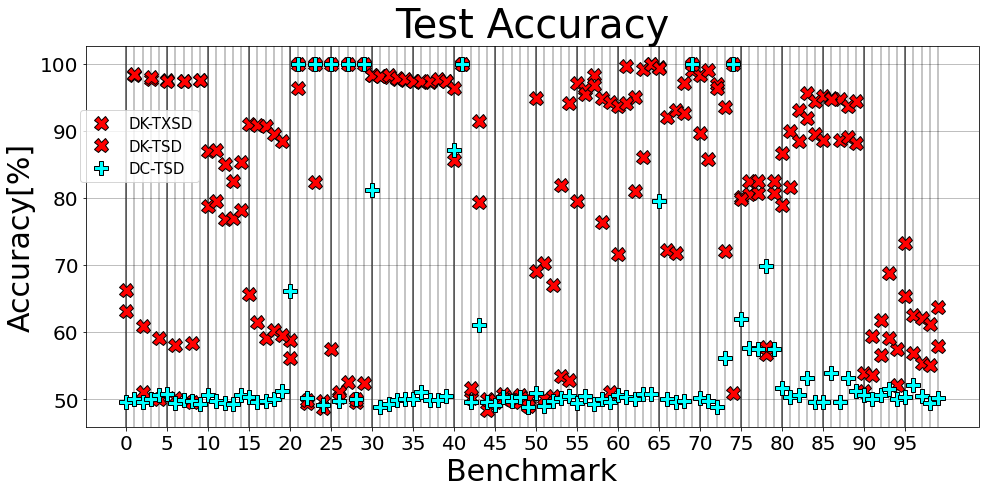

In [2]:
#import matplotlib.font_manager

fig = plt.figure(figsize=(16,7))
ax = plt.gca()
plt.xticks(range(0,100,5), fontsize=50)
for b in range(0,100,1):
    plt.axvline(x=b, color='k', alpha = 0.3)
for b in range(0,100,5):
    plt.axvline(x=b, color='k', alpha = 0.5)
plt.grid()
#lineSD, = ax.plot(SD.b, SD.t , 's', c='#0aff02', alpha=1, markeredgecolor='k', markersize = 20, label = 'SD')
#lineISD, = ax.plot(ISD.b, ISD.t , 'D', c='blue', alpha=1, markeredgecolor='k', markersize = 18 , label = 'ISD')
#lineIDSD, = ax.plot(IDSD.b, IDSD.t, 'o', c='white', alpha=1, markeredgecolor='k', markersize = 16, label = 'IDSD')
#linearMUESLI, = ax.plot(arMUESLI.b, arMUESLI.t, '*', c='red', alpha=1, markeredgecolor='k', markersize = 15, label = 'arMUESLI')
#linedcIDSD, = ax.plot(dcIDSD.b, dcIDSD.t, 'P', c='k', alpha=1, markeredgecolor='k', markersize = 11, label = 'dcDSD')
#lineRASS, = ax.plot(rass.b, rass.t, 'o', c='gold', alpha=1, markeredgecolor='k', markersize = 11, label = 'dcDSD')

#line0, = ax.plot(D0.b, D0.t , 's', c='#0aff02', alpha=1, markeredgecolor='k', markersize = 20, label = 'SD')

#line1, = ax.plot(D1.b, D1.t , 'D', c='blue', alpha=1, markeredgecolor='k', markersize = 18 , label = 'ISD')
#line2, = ax.plot(D2.b, D2.t , 'v', c='white', alpha=1, markeredgecolor='k', markersize = 16 , label = 'ITSD')
line3, = ax.plot(D3.b, D3.t , 'X', c='red', alpha=1, markeredgecolor='k', markersize = 14 , label = 'DK-TXSD')
line4, = ax.plot(D5.b, D5.t , 'X', c='red', alpha=1, markeredgecolor='k', markersize = 14 , label = 'DK-TSD')
line5, = ax.plot(D6.b, D6.t , 'P', c='cyan', alpha=1, markeredgecolor='k', markersize = 14 , label = 'DC-TSD')


ax.legend( handles = [ line3, line4, line5 ], fontsize=15, bbox_to_anchor=(0.095, 0.75, 0.04, .102)) #,

plt.rcParams["font.family"] = "sans"
plt.xlabel('Benchmark', fontsize=30)
plt.ylabel('Accuracy[%]', fontsize=30)
plt.title('Test Accuracy', fontsize=40)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('acc.png')

In [3]:
from tabulate import tabulate
def extract_row_data( X, runtime, label ):
    return [label, np.mean(X.l),np.mean(X.t), np.mean(X.g), np.mean(X.d), np.mean(X.v-X.t), np.mean(runtime)]

row0 = extract_row_data( D0, D0r, "SD")
row1 = extract_row_data( D1, D1r, "ISD")
row2 = extract_row_data( D2, D2r, "ITSD")
row3 = extract_row_data( D3, D3r, "IXTSD")
row4 = extract_row_data( D4, D4r, "IDSD")
row5 = extract_row_data( D5, D5r, "dcTSD")
row6 = extract_row_data( D6, D6r, "dxXTSD")

#row5 = extract+_row_data( dcIDSD, runtimedcIDSD, "dcIDSD" )

#row2 = ["I-DSD",np.mean(t2), np.mean(g2), np.mean(s2), np.mean(d2), np.mean(np.abs(t2-v2))];
table = [ row0, row1, row2, row3, row4, row5, row6 ] #row2
print(tabulate(table, headers = ["method","train accuracy[%]","test accuracy[%]","And gates","levels","overfit[%]","time[s]"], tablefmt="github"))

| method   |   train accuracy[%] |   test accuracy[%] |   And gates |   levels |   overfit[%] |    time[s] |
|----------|---------------------|--------------------|-------------|----------|--------------|------------|
| SD       |             99.9964 |            68.5792 |     2273.42 |    90.59 |     0.017197 |    7.963   |
| ISD      |             99.9964 |            80.5448 |     1027.48 |    28.89 |     0.113436 |    8.47753 |
| ITSD     |             99.9964 |            80.5448 |      873.43 |    25.34 |     0.113436 |    7.9627  |
| IXTSD    |             99.9964 |            81.0447 |      836.77 |    25.26 |     0.098592 |   10.2701  |
| IDSD     |             99.9952 |            81.0786 |      832.04 |    25.1  |     0.075776 | 2134.83    |
| dcTSD    |             99.9964 |            76.2262 |     1454.96 |    84.52 |     0.018438 |   46.8298  |
| dxXTSD   |             99.9966 |            55.9742 |     3928.68 |   183.51 |    -0.017976 |  854.057   |


# Experiment 2

In [4]:
np.mean((D4.t-D1.t)/D1.t)

0.010807150550096414

In [5]:
np.mean((D4.g-D1.g)/D1.g)

-0.17313264204204235

In [7]:
np.mean((D4.d-D1.d)/D1.d)

-0.11818151083951324

In [8]:
np.mean((D3.t-D1.t)/D1.t)

0.01024825734450812

In [10]:
np.mean((D3.g-D1.g)/D1.g)

-0.16969546360980092

In [11]:
np.mean((D3.d-D1.d)/D1.d)

-0.11576956459110298

In [30]:
np.mean((D2.t-D5.t)/D5.t)

0.07658345734049149

In [37]:
np.mean((D2.g-D5.g)/D2.g)

-1.384093776141301

In [33]:
print(D2.b, D5.b)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.] [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]


In [40]:
A=[[1, 0.88, 0.76, 0.65, 0.43, 0.35, 0.23, 0.19, 0.1, 0.06, 0.01, 0.01, 0, 0, 0, 0],
[ 1, 1, 0.98, 0.95, 0.66, 0.53, 0.34, 0.25, 0.16, 0.1, 0.02, 0.01, 0.01, 0, 0, 0],
[ 1, 1, 0.98, 0.95, 0.66, 0.54, 0.34, 0.25, 0.15, 0.09, 0.02, 0.01, 0.01, 0, 0, 0],
[ 1, 1, 0.85, 0.61, 0.5, 0.4, 0.26, 0.21, 0.17, 0.11, 0.02, 0.01, 0.01, 0, 0, 0],
[ 1, 1, 0.43, 0.39, 0.29, 0.29, 0.19, 0.19, 0.17, 0.12, 0.03, 0.02, 0.01, 0, 0, 0],
[ 1, 1, 0.85, 0.63, 0.48, 0.4, 0.28, 0.22, 0.16, 0.09, 0.02, 0.01, 0.01, 0, 0, 0],
[ 1, 1, 0.46, 0.4, 0.32, 0.3, 0.21, 0.17, 0.15, 0.12, 0.03, 0.02, 0.01, 0, 0, 0],
[ 1, 1, 0.98, 0.95, 0.66, 0.54, 0.34, 0.25, 0.14, 0.08, 0.02, 0.01, 0.01, 0, 0, 0],
[ 1, 1, 0.75, 0.63, 0.46, 0.4, 0.28, 0.22, 0.16, 0.09, 0.02, 0.01, 0.01, 0, 0, 0],
[ 1, 1, 0.43, 0.37, 0.33, 0.29, 0.21, 0.18, 0.16, 0.11, 0.02, 0.01, 0.01, 0, 0, 0],
[ 1, 1, 0.38, 0.37, 0.32, 0.28, 0.21, 0.19, 0.16, 0.09, 0.02, 0.01, 0.01, 0, 0, 0],
[ 1, 1, 0.39, 0.35, 0.34, 0.28, 0.22, 0.19, 0.15, 0.09, 0.02, 0.01, 0.01, 0, 0, 0],
[ 1, 1, 0.43, 0.41, 0.32, 0.28, 0.22, 0.19, 0.15, 0.09, 0.02, 0.01, 0.01, 0, 0, 0,]]

In [107]:
import matplotlib.pyplot as plt

plt.style.use('plot_style.txt')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
import matplotlib as mpl
#=========================================================== # Directory and filename; style file open #=========================================================== # Change to the directory which contains the current script 
dirFile = os.path.dirname(os.path.join('YourDirHere',
                          'NicePlotProductivity.py'))
# Load style file plt.style.use(os.path.join(dirFile, 'PaperDoubleFig.mplstyle'))
# Make some style choices for plotting 
colourWheel =['#329932',
            '#ff6961',
            'b',
            '#6a3d9a',
            '#fb9a99',
            '#e31a1c',
            '#fdbf6f',
            '#ff7f00',
            '#cab2d6',
            '#6a3d9a',
            '#ffff99',
            '#b15928',
            '#67001f',
            '#b2182b',
            '#d6604d',
            '#f4a582',
            '#fddbc7',
            '#f7f7f7',
            '#d1e5f0',
            '#92c5de',
            '#4393c3',
            '#2166ac',
            '#053061']
dashesStyles = [[3,1],
            [1000,1],
            [2,1,10,1],
            [4, 1, 1, 1, 1, 1]]

labels = ['01','03','06','07','0f','16','17','18','19','1b','1e','3c','69']
# Point to the data fileName = 'rftxlicp1017unlinked.xls'


In [110]:
def print_td( X, Title ):

    plt.close('all')
    fig, ax = plt.subplots()
    for j in range(np.shape(X)[1]):
            alphaVal = 0.5
            linethick = 1
            COL = colourWheel[j%len(colourWheel)]
            DASH=dashesStyles[j%len(dashesStyles)]
            MARK = "o"
            P = [ X[i][j] for i in range( np.shape(X)[0] )]
            ax.plot(P,
            color=COL,
            linestyle = '-',
            marker = MARK,
            markersize=10,
            dashes=DASH,
            lw=linethick,
            label=labels[j],
            alpha=alphaVal)
        
    ax.set_xlabel("Number of $don't$ $cares$: $N_e$")
    ax.set_ylabel('Detection Rate', loc = "center")
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.major.formatter._useMathText = True
    ax.yaxis.set_minor_locator(  AutoMinorLocator(1))
    ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.yaxis.set_label_coords(-0.15,0.5)
    ax.yaxis.tick_left()
    nameOfPlot = Title
    plt.title(nameOfPlot)
#    plt.ylabel(nameOfPlot,rotation=0)
    ax.legend(frameon=True, loc='best',ncol=3,handlelength=1)
    plt.savefig(('a.png'))
    
    plt.show()


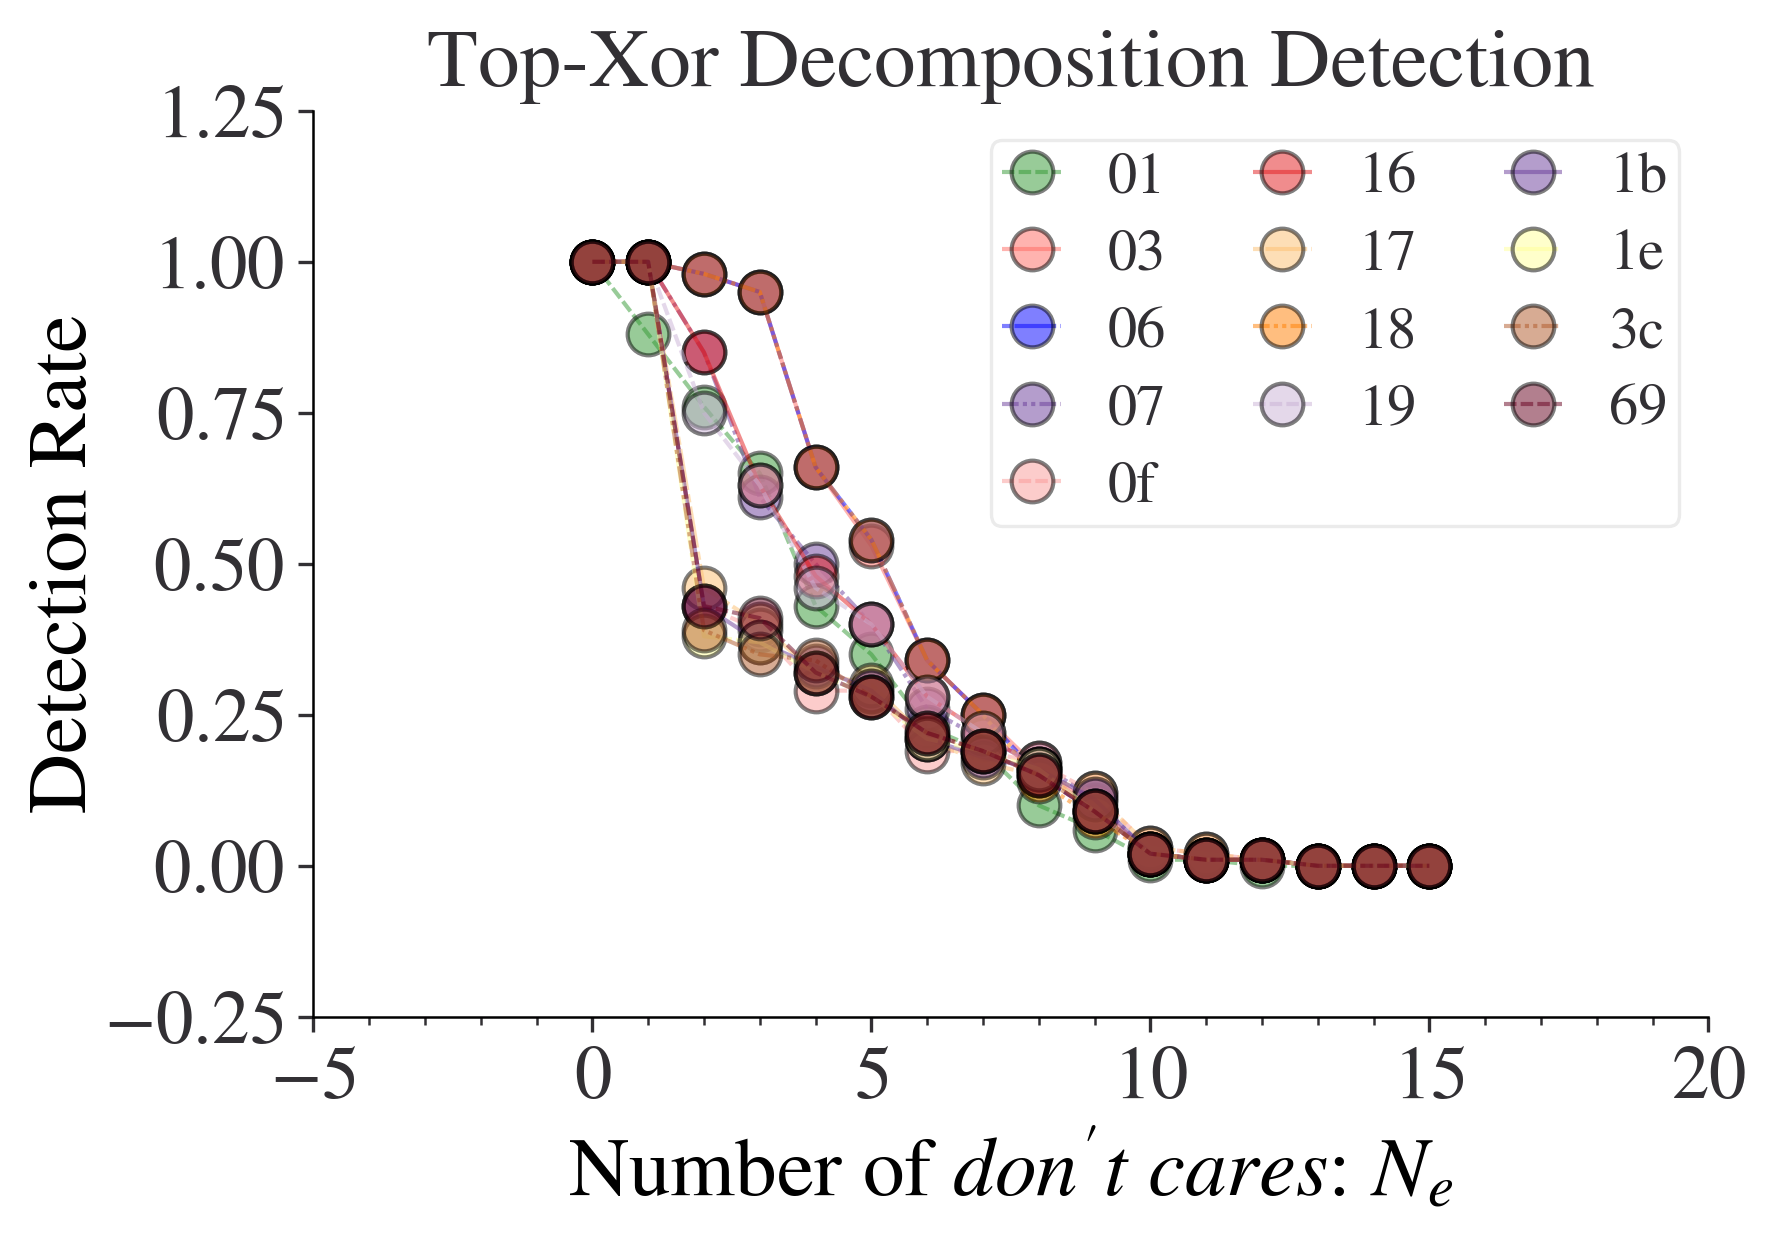

In [111]:
print_td( np.transpose(A), "Top-Xor Decomposition Detection" )

In [166]:
import matplotlib.pyplot as plt

plt.style.use('plot_style.txt')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
import matplotlib as mpl
#=========================================================== # Directory and filename; style file open #=========================================================== # Change to the directory which contains the current script 
dirFile = os.path.dirname(os.path.join('YourDirHere',
                          'NicePlotProductivity.py'))
# Load style file plt.style.use(os.path.join(dirFile, 'PaperDoubleFig.mplstyle'))
# Make some style choices for plotting 
colourWheel =['#329932',
            '#ff6961',
            'b',
            '#6a3d9a',
            '#fb9a99',
            '#e31a1c',
            '#fdbf6f',
            '#ff7f00',
            '#cab2d6',
            '#6a3d9a',
            '#ffff99',
            '#b15928',
            '#67001f',
            '#b2182b',
            '#d6604d',
            '#f4a582',
            '#fddbc7',
            '#f7f7f7',
            '#d1e5f0',
            '#92c5de',
            '#4393c3',
            '#2166ac',
            '#053061']
dashesStyles = [[3,1],
            [1000,1],
            [2,1,10,1],
            [4, 1, 1, 1, 1, 1]]

labels = ['DC-TSD','DC-XTSD','DK-TSD']
# Point to the data fileName = 'rftxlicp1017unlinked.xls'
MARK=['o','o','*']
SIZE=[10,7,8]
COLOR=['red','cyan','gold']


In [169]:

def print_tdA( X, Title ):

    plt.close('all')
    fig, ax = plt.subplots()
    for j in range(np.shape(X)[1]):
            alphaVal = 1
            linethick = 1
            COL = colourWheel[j%len(colourWheel)]
            DASH=dashesStyles[j%len(dashesStyles)]
            P = [ X[i][j] for i in range( np.shape(X)[0] )]
            ax.plot(P,
            color=COLOR[j],
            linestyle = '-',
            marker = MARK[j],
            markersize=SIZE[j],
            dashes=DASH,
            lw=linethick,
            label=labels[j],
            alpha=alphaVal)
        
    ax.set_xlabel("benchmark")
    ax.set_ylabel('Accuracy[%]', loc = "center")
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.major.formatter._useMathText = True
    ax.yaxis.set_minor_locator(  AutoMinorLocator(1))
    ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.yaxis.set_label_coords(-0.15,0.5)
    ax.yaxis.tick_left()
    nameOfPlot = Title
    plt.title(nameOfPlot)
#    plt.ylabel(nameOfPlot,rotation=0)
    ax.legend(frameon=True, loc='best',ncol=3,handlelength=1)
    plt.savefig(('a.png'))
    
    plt.show()


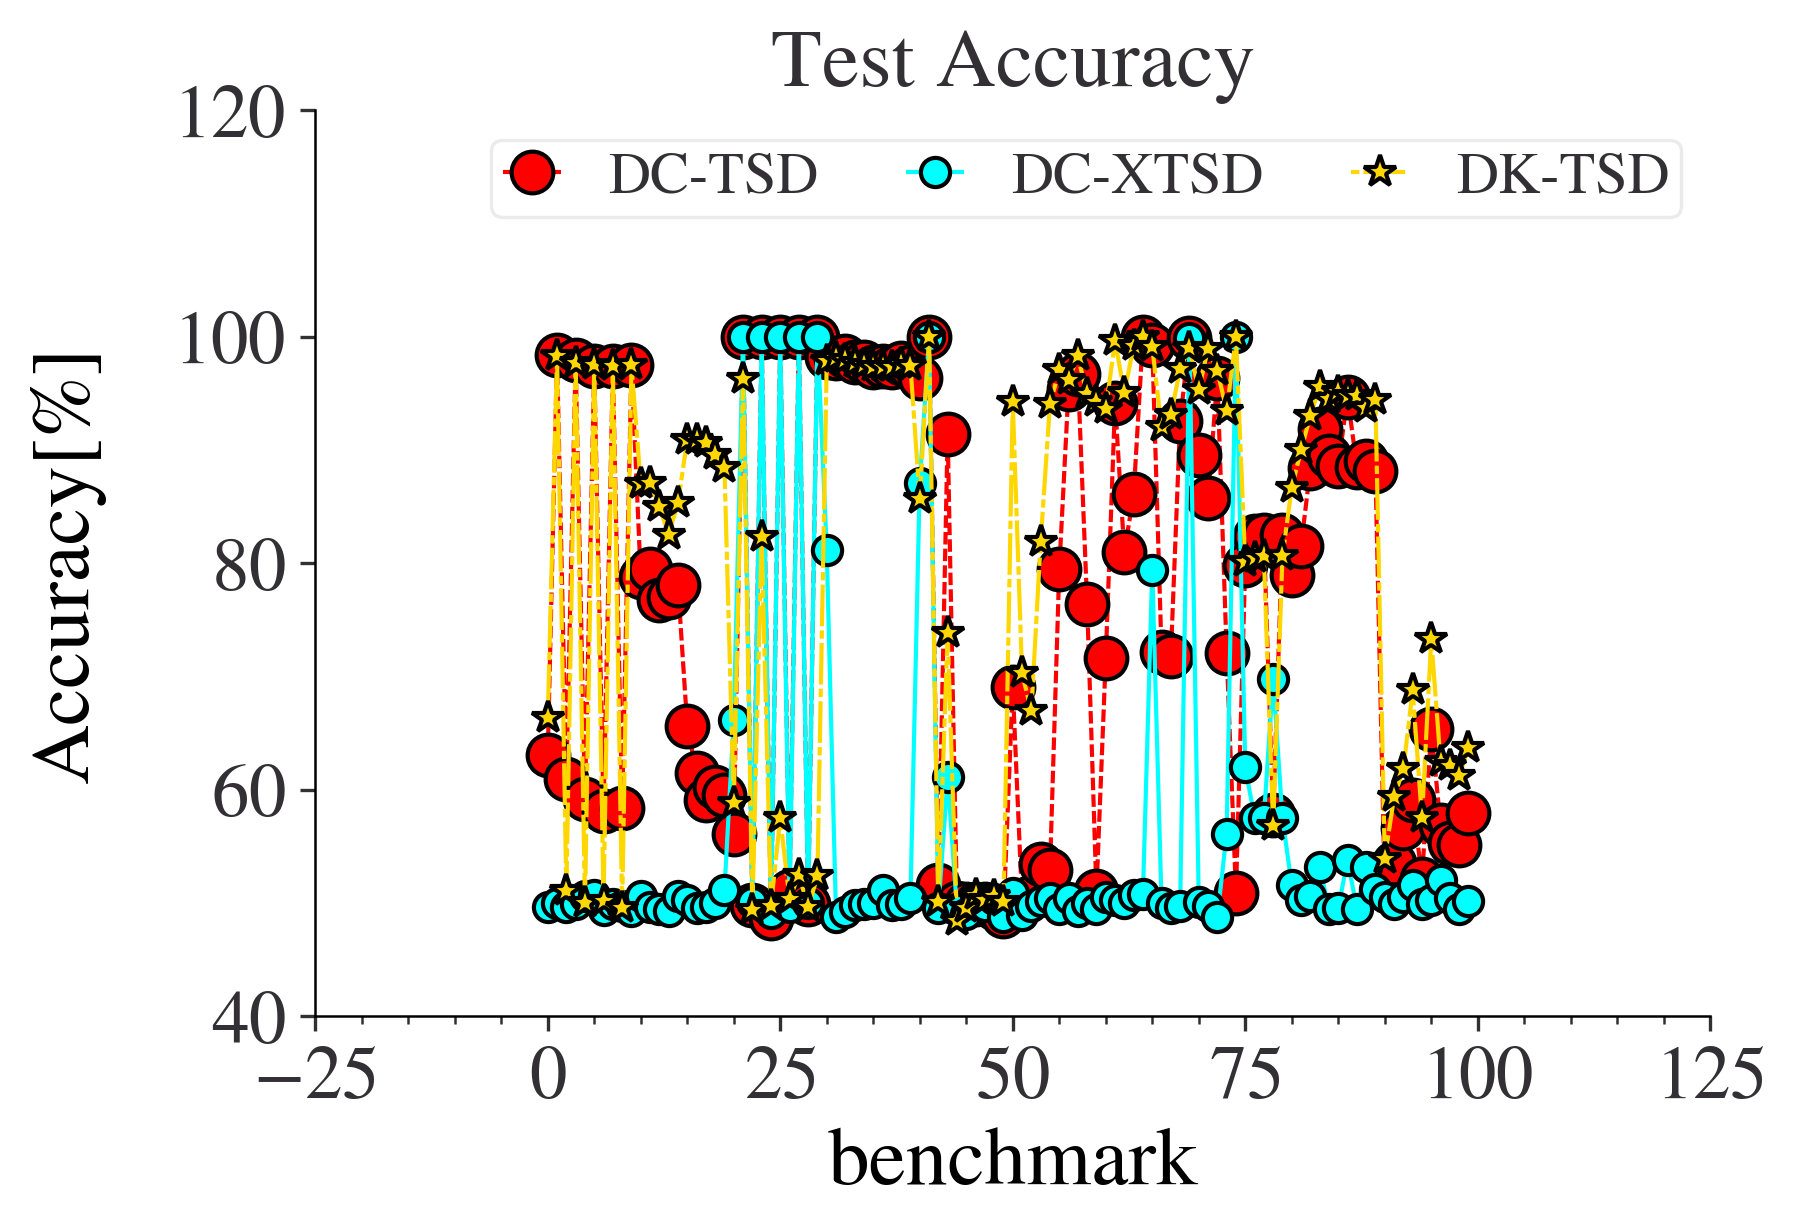

In [170]:
X=[D5.t, D6.t, D3.t]
print_tdA( np.transpose(X), "Test Accuracy" )